# Worked Problem Assignment 1

### <p style="text-align: right;">  Kyle Taft

In [1]:
# Import packages
from IPython.display import Image
from IPython.core.display import HTML
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

____

### Question 1


My problem is inspired by the problem set from "Nonlinear Dynamics and Chaos" by Steven H. Strogatz. The problem is summarized as follows: The relativistic equation for the orbit of a planet around the sun is given by:

$$\frac{d^2u}{d\theta^2} + u = \alpha + \epsilon u^2$$

where $u = 1/r$, $\alpha$ is a constant, and $\epsilon u^2$ is Einstein's correction. $\epsilon$ is a small parameter.
(Strogatz, 1994).

In order to plot a phase space diagram we first linearize the equation. We do this by setting: 

$$\frac{du}{d\theta} = v$$

$$\frac{dv}{d\theta} = \alpha + \epsilon u^2 - u$$ 

Text(0.5, 1.0, 'Phase Portrait with Einstein correction')

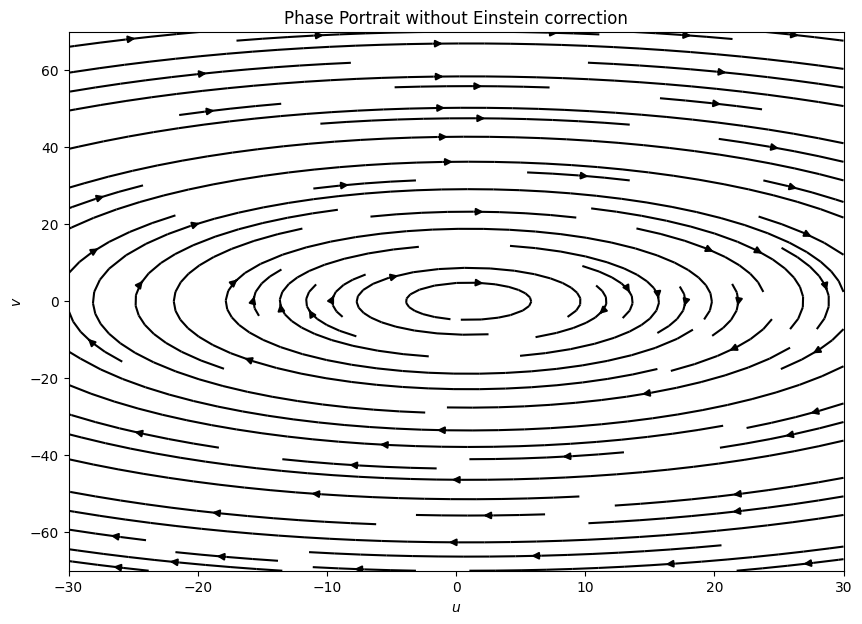

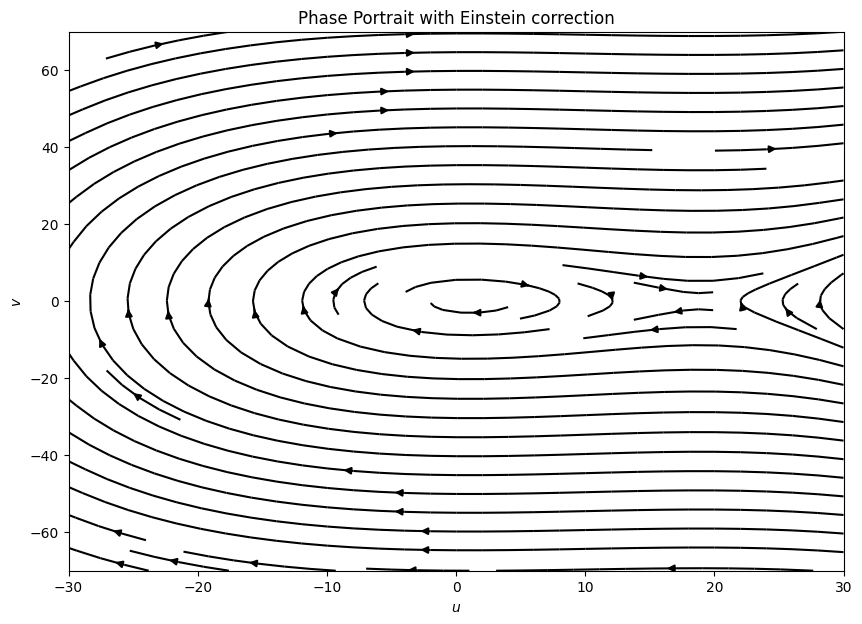

In [58]:
# We can then plot the phase space diagram for the linearized equation

# Define the functions above
def PhasePortrait(u, v, alpha, epp):   
    udot, vdot = [v, alpha + epp*u**2 - u]
    return udot, vdot

#Find u and v for a grid of values
def ComputePhase(U, V, alpha, epp):
    # Prep the arrays with zeros
    udot, vdot = np.zeros(U.shape), np.zeros(V.shape)

    # Set the limits
    Ulim, Vlim = U.shape
    
    ## Calculate the changes at each location and add them to the arrays
    for i in range(Ulim):
        for j in range(Vlim):
            xloc = U[i, j]
            yloc = V[i, j]
            udot[i,j], vdot[i,j] = PhasePortrait(xloc, yloc, alpha, epp) 
    return udot, vdot

# Plot
u = np.linspace(-30.0, 30.0, 40)
v = np.linspace(-70.0, 70.0, 40)


## Get back pairs of coordinates for every point in the space
U, V = np.meshgrid(u, v)

##### W/O Einstein correction #####
alpha = 1
epp = 0
## Run our calculations
udot, vdot = ComputePhase(U, V, alpha, epp)
plt.figure(figsize=(10,7))
plt.streamplot(U, V, udot, vdot, color='k',broken_streamlines = True)
plt.xlabel('$u$')
plt.ylabel('$v$')
plt.title('Phase Portrait without Einstein correction')


# With Einstein correction
alpha = 1
epp = 0.05 # exaggerated value
## Run our calculations
udot, vdot = ComputePhase(U, V, alpha, epp)
plt.figure(figsize=(10,7))
plt.streamplot(U, V, udot, vdot, color='k',broken_streamlines = True)
plt.xlabel('$u$')
plt.ylabel('$v$')
plt.title('Phase Portrait with Einstein correction')


These phase portraits gives us interesting results. In the first diagram I plot with eppsilon (the realitivity correction) equal to 0 to see if we get what we expect. And we do, we see nice closed eliptical orbits. In the second diagram I plot with epsilon equal to 0.1 (a very high value to show an exagerated difference). We see that the orbits are no longer closed, but instead as v gets greater we see the orbits spiral outwards. This is because the correction term is causing the orbits to be unstable.

We see a possible stable point at the very center of the orbit towards the sun.

Solving for stable points we get:

$$\frac{du}{d\theta} = 0$$

$$\frac{dv}{d\theta} = 0$$


$$\alpha + \epsilon u^2 - u = 0$$

Using the quadratic formula we get:

$$u = \frac{1 \pm \sqrt{1 - 4\epsilon\alpha}}{2\epsilon}$$



To classify the stability of these points we use the Jacobian matrix:

$$J = \begin{bmatrix}
\frac{\partial f}{\partial u} & \frac{\partial f}{\partial v} \\
\frac{\partial g}{\partial u} & \frac{\partial g}{\partial v}
\end{bmatrix}$$

Where $f = \frac{du}{d\theta}$ and $g = \frac{dv}{d\theta}$

$$J = \begin{bmatrix}
0 & 1 \\
2\epsilon u -1 & 0
\end{bmatrix}$$

For first stable point (+):

$$J = \begin{bmatrix}
0 & 1 \\
\sqrt{1 - 4\epsilon\alpha} & 0
\end{bmatrix}$$

For second stable point (-):

$$J = \begin{bmatrix}
0 & 1 \\
-\sqrt{1 - 4\epsilon\alpha} & 0
\end{bmatrix}$$

In the textbook "Nonlinear Dynamics and Chaos" by Steven H. Strogatz as mentioned above, chapter 5.2 discusses how to classify these points in a slightly different way than discussed in class: